In [38]:
import numpy as np
import matplotlib.pyplot as plt

# generate some linear-looking data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [39]:
# compute theta using the normal equation
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [40]:
# print values of theta 0 and theta 1
theta_best

array([[3.87557976],
       [3.13891103]])

# Linear Regression

In [41]:
# import the model
from sklearn.linear_model import LinearRegression

# initialize the model
lin_reg = LinearRegression()

# fit the model
lin_reg.fit(X,y)

# print intercept and coefficient
lin_reg.intercept_, lin_reg.coef_

(array([3.87557976]), array([[3.13891103]]))

In [42]:
# least squares
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [43]:
theta_best_svd

array([[3.87557976],
       [3.13891103]])

In [44]:
# compute the psuedoinverse
np.linalg.pinv(X_b).dot(y)


array([[3.87557976],
       [3.13891103]])

Important note: the Singular Value Decomposition (SVD) approach used by sklearn's linear regression class is about O(n sqaured). Be warned that when the number of features doubles, the computation time increases by roughly four times.

Both the normal equation and SVD get very slow when the number of features is large (100k), however, they are both linear with regard to number of instances in the training set so they can handle large training sets as long as those sets can fit in memory.

# Gradient Descent

definition: "a generic optimizatino algorithm capable of finding optimal solutions to a wide range of problems"

basic idea is to adjust parameters iteratively in order to minimize a cost function

learning rate matters a lot - to slow and you never arrive at the optimal theta, too large and you jump back and forth across the valley and never get to the bottom

goal: get to the global minimum

NOTE: gradient descent requires that all features have a similar scale (e.g. StandardScaler) or else it will take too long to converge

# Batch Gradient Descent


Something to remember, one of the challenges with batch gradient descent is that it uses the whole training set to compute the gradients at every step which makes it very slow.

In [45]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [46]:
theta

array([[3.87557976],
       [3.13891103]])

# Stochastic Gradient Descent

The helpful thing about stochastic gradient descent is that it picks a random instance in the training set at every step and only computes based on that instance. There's less data to manipulate and it is much faster. Which also makes it better suited for large training sets. It can also be implemented out-of-core.

In [47]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [48]:
theta

array([[3.86171885],
       [3.13339455]])

The upside of randomness is that you have a better chance of making progress and the downside is that you can never settle at the global minimum. One way to counteract this is to start with large learning steps and them slowly get smaller ad smaller.

In [49]:
# here's another example with a learning schedule:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [50]:
theta

array([[3.85778772],
       [3.15249694]])

fun fact: each iteration is called an "epoch"

In [51]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [52]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.84791173]), array([3.13606836]))

# Mini-batch Gradient Descent

Computing the gradients based on small random sets of instances called "mini-batches"

similar problems with bouncing around, better performance and speed


# Polynomial Regression

add powers of each feature as new features, then train a linear model on the extended set of features, a.k.a. Polynomial Regression

In [53]:
# make some test data
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)


In [54]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)



In [55]:
X[0]

array([-1.78259956])

In [56]:
X_poly[0]

array([-1.78259956,  3.1776612 ])

the cool thing is that we can use this to find relationships between features, which a plain linear regression model cannot do

# Learning Curves

learning curves are plots of a model's performance on the training set and the validation set as a function of the training set size or iteration

In [57]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

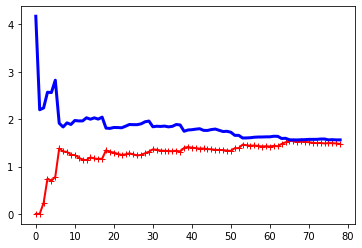

In [58]:
# plot learning curves of linear regression
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

##### As new instances are added to the training set, the model can no longer fit well. So, the error goes up until it reaches a plateau, at which point adding new instances no longer has much impact

##### This pattern is typical of a model that is underfitting

## 10th-degree polynomial model

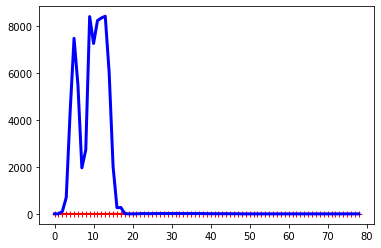

In [59]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)

# Bias/Variance Tradeoff

### Bias

- The portion of generalization error that is due to incorrect assumptions
- High bias is most likely going to underfit the training data

### Variance

- The portion of generalization error that is due to a model's excessive sensitivity to small variations in the training data. 
- High variance is most likely goign to overfit the training data

### Irreducible error

- The portion of the generalization error that is due to the noisiness of the data itself
- The only way to reduce this part of the error is to clean up the data, fix broken sources or sensors, and remove outliers

# Regularized Linear Models

Giving a model fewer degrees of freedom reduces risk of overfitting. For example, in a polynomial model, reducing the number of polynomial degrees.

### Ridge Regression

- aka Tikhonov regularization
- Forces the learning algorithm to fit not only the data but to keep the model weights as small as possible
- this should only be added to the cost function during training
- once trained, a model's performance should be evaluated by the unregularized performance measure

In [61]:
# closed-form solution that uses matrix factorization technique
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.4938366]])

In [62]:
# stochastic gradient descent
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])


array([5.46073614])

### Lasso Regression

- Least Absolute Shrinkage and Selection Operator Regression (LASSO)
- adds a regularization term to the cost function BUT uses the l1 norm of the vector weight instead of the half the square of the l2 norm
- important to know: it tends to eliminate the weights of the least important features (set them to zero)

In [63]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.46005426])

### Elastic Net

- middle ground between ridge and lasso regression
- control the mix ratio r
- when r is 0, it is similar to ridge regression and when r is 1 it is similar to lasso regression


#### when to use it: 

- it is almost always preferable to have at least a little bit of regularization, so you general should avoid linear regression. 
- ridge is a good default, but if you suspect only a few features are needed then prefer lasso or elastic
- elastic is preferred generally because lasso sometimes behaves erratically when the number of features is greater than the number of training instances or when several features are strongly correlated

In [64]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.45680306])